In [0]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

def move_spines():
    """Crea la figura de pyplot y los ejes. Mueve las lineas de la izquierda y de abajo
    para que se intersecten con el origen. Elimina las lineas de la derecha y la de arriba.
    Devuelve los ejes."""
    fix, ax = plt.subplots()
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_position("zero")
    
    for spine in ["right", "top"]:
        ax.spines[spine].set_color("none")
    
    return ax

def vect_fig(): 
    """Genera el grafico de los vectores en el plano"""
    ax = move_spines()
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid()
    vecs = [[4, 2]] # lista de vectores
    for v in vecs:
        ax.annotate(" ", xy=v, xytext=[0, 0],
                   arrowprops=dict(facecolor="blue",
                                  shrink=0,
                                  alpha=0.7,
                                  width=0.5))
        ax.text(1.1 * v[0], 1.1 * v[1], v)

# Norm and Orthogonality

If we want to know the length of a vector, all we need is the famous Pythagorean theorem. In the plane $\mathbb{R}^2$, the length of a vector $v = (a, b)$ a to be equal to the distance from the origin $(0, 0)$ to the point $(a, b)$. This distance can be easily calculated thanks to Pythagoras' theorem and will be equal to  $\sqrt{a^2 + b^2}$, as you can see in the following figure:

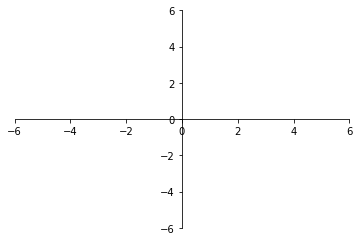

In [0]:
ax = move_spines()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
# ax.grid()
v = np.array([4, 6])
# vect_fig()

# a = ax.vlines(x=v[0], ymin=0, ymax = 6, linestyle='--', color='g')

In this definition we can see that $a^2 + b^2 = v \cdot v$, so we are already in a position to define what in Linear Algebra is known as the norm.

The length or norm of a vector $v = \begin{bmatrix} v_1 \ v_2 \vdots \ v_n \end{bmatrix}$, in $\mathbb{R}^n$ is going to be equal to a non-negative number $||v||$ defined by:

$$||v|| = \sqrt{v \cdot v} = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}$$

That is, the rule of a vector will be equal to the square root of the sum of the squares of its components.

### Orthogonality

The concept of perpendicularity is fundamental in geometry. This concept taken to the vectors in $\mathbb{R}^n$ is called orthogonality.

Two vectors $v$ and $w$ in $\mathbb{R}^n$ will be orthogonal to each other if their inner product is zero. That is, $v \cdot w = 0$.

In [0]:
# checking inner product
v = np.array([4, 6])
w = np.array([-3, 2])
# v.dot(w)

A set of vectors in $\mathbb{R}^n$ will be orthogonal if all the pairs of the different vectors in the set are orthogonal to each other. That is to say:

$v_i \cdot v_j = 0$ for all $i, j = 1, 2, \dots, k$ and where $i \ne j$.

For example, if we have the following set of vectors in $\mathbb{R}^3$:

$$v1 = \begin{bmatrix} 2 \\ 1 \\ -1 \end{bmatrix} \ 
v2 =\begin{bmatrix} 0 \\ 1 \\ 1 \end{bmatrix}
v3 = \begin{bmatrix} 1 \\ -1  \\ 1 \end{bmatrix}$$

In this case, we should check that:

$$v1 \cdot v2 = 0, v2 \cdot v3 = 0, v1\cdot v3 = 0 $$


In [0]:
v1 = np.array([2, 1, -1])
v2 = np.array([0, 1, 1])
v3 = np.array([1, -1, 1])

# v1.dot(v2), v2.dot(v3), v1.dot(v3)

As we can see, this set is orthogonal. One of the main advantages of working with orthogonal vector sets is that they are necessarily linearly independent.

The concept of orthogonality is one of the most important and useful in linear algebra and it arises in many practical situations, especially when we want to calculate distances.

### Eigenvalues and eigenvectors

When we're solving linear equations of the type $Ax = b$, we're working with static problems. But what if we wanted to work with dynamic problems? It is in this type of situation that Eigenvalues and Eigenvectors have their greatest importance.

Suppose we have a $A$ square matrix of $n n$times. A natural question that we could ask ourselves about $A$ is: Is there any non-zero $x$ vector for which $Ax$ is a multiple of $x$? If we take this question to the mathematical language we will find the following equation:

$$Ax = \lambda x$$
When this equation is valid and $x$ is not zero, we say that $\lambda$ is the Eigenvalue or proper value of $A$ and $x$ is its corresponding Eigenvector or proper vector.

Many problems in science derive in problems of Eigenvalues, in which the main question is: Which are the Eigenvalues of a given matrix, and which are their corresponding Eigenvectors. One area where this theory will be very useful is in problems with systems of linear differential equations.

### Calculating eigenvalues

So far so good, but given a $A$$\times n$ square matrix, how can we get your Eigenvalues?.

We can start by observing that the equation $Ax = \lambda x$ is equivalent to $(A - \lambda I)x = 0$. Since we are interested in solutions to this equation that are different from zero, the matrix $A - I$ wave must be singular, not invertible, therefore its determinant must be zero, $\det (A - \lambda I) = 0$. Thus, we can use this equation to find the Eigenvalues of $A$. In particular, we could form the characteristic polynomial of the $A$ matrix, which will have degree $n$ and therefore will have $n$ solutions, that is, we will find $n$ Eigenvalues. Something we must take into account is that, even though the $A$ matrix is real, we must be prepared to find Eigenvalues that are complex.

To make it clearer, let's see an example of how we can calculate the Eigenvalues. Suppose we have the following matrix:


$$A = \begin{bmatrix} 3 & 2 \\ 7 & -2 \end{bmatrix}$$
Its characteristic polynomial will be equal to:

$$p(\lambda) = \det (A - \lambda I) = \det \begin{bmatrix}3 - \lambda & 2 \ 7 & -2-\lambda\end{bmatrix} = (3 - \lambda)(-2-\lambda) - 14 \ =\lambda^2 - \lambda - 20 = (\lambda - 5) (\lambda + 4)$$

Therefore the $A$ Eigenvalues are going to be $5$ and -4.

Obviously, we can also get them much more easily with the help of Python.

In [0]:
# Eigenvalues with numpy
A = np.array([[3, 2],
              [7, -2]])

x, v = np.linalg.eig(A)

# x Eigenvalue, v Eigenvector
# x, v

In [0]:
# Eigenvalues with SymPy
A = sympy.Matrix([[3, 2],
                  [7, -2]])

# Eigenvalue
#A.eigenvals()

In [0]:
# Eigenvector
#A.eigenvects()

In [0]:
# checking the solution Ax = λx
# x eigenvector, v eigenvalue
x = A.eigenvects()[0][2][0]
v = A.eigenvects()[0][0]

# Ax == vx
#A*x, v*x

__Exercise 1__: Given $$A = {\begin{bmatrix} 3 & 3 & -2 \\ 0 & -1 & 0 \\ a & b & c \end{bmatrix}}^T$$ 
- Calculate A so that $(2, 0, -1)^T$
is an auto-vector whose corresponding auto-value is
$\lambda$= -1.
- Find the rest of the eigenvalues and eigenvectors.